In [9]:
# general imports
import os.path as op
import os

# third party imports
import numpy as np
import nibabel as nib
from scipy.ndimage.interpolation import zoom

import SimpleITK as sitk
import matplotlib.image as mpimg

import matplotlib.pyplot as plt

In [10]:
require_labels = [0,    # background
                  1,    # spleen
                  2,    # right kidney
                  3,    # left kidney
                  6]    # liver

resample_size = [256,256,32]
nii_path = '../../Dataset/CHAOS/CHAOS_nii/'
save_path_npy = '../../Dataset/CHAOS/CHAOS_%d_%d_%d/' % \
            (resample_size[0], resample_size[1], resample_size[2])
path = ['/root/autodl-tmp/Train_Sets/MR/']
save_path = '../../Dataset/CHAOS/CHAOS_%d_%d_%d_nii/' % \
            (resample_size[0], resample_size[1], resample_size[2])

In [11]:
def read_nii( volume_path):
    nii = nib.load(volume_path)
    data = nii.get_fdata()
    header = nii.header
    affine = nii.affine
    spacing = list(nii.header['pixdim'][1:4])
    return data, header, affine, spacing

def create_path(pathlist):
    for path in pathlist:
        if not op.exists(path):
            os.makedirs(path)
            
def save_nii( data, save_path, header, affine):
    new_img = nib.Nifti1Image(data, affine, header)
    nib.save(new_img, save_path)

def resize(img, label, spacing, resample_size):
    assert img.shape == label.shape
    origin_shape = img.shape
    new_space = spacing * origin_shape / resample_size
    resize_factor = 1.0 * np.asarray(resample_size) / np.asarray(origin_shape)
    print('resize_factor: ', resize_factor)
    img = zoom(img, resize_factor, order=1) #order = 1：bilinear interpolaion
    label = zoom(label, resize_factor, order=0) #order = 0:nearest
    return img, label, new_space
         
def create_and_save_resize_data(resample_size, img, label, patient,
                                spacing,img_header, img_affine,nii_save_path):
    img, label, new_space = resize(img, label, np.array(spacing), resample_size)
    img_header['pixdim'][1:4] = new_space
    save_nii(img, op.join(nii_save_path, 'procimg.nii.gz'), img_header, img_affine)
    save_nii(label, op.join(nii_save_path, 'seg.nii.gz'), img_header, img_affine)

    
    return img, label, new_space


['1', '10', '13', '15', '19', '2', '20', '21', '22', '3', '31', '32', '33', '34', '36', '37', '38', '39', '5', '8'] 20
Proprecess train image 1
[[  -1.54296875    0.            0.          192.65368652]
 [  -0.            1.54296875    0.         -200.6612854 ]
 [   0.           -0.            7.69999981  -77.09216309]
 [   0.            0.            0.            1.        ]]
(256, 256, 36) float32


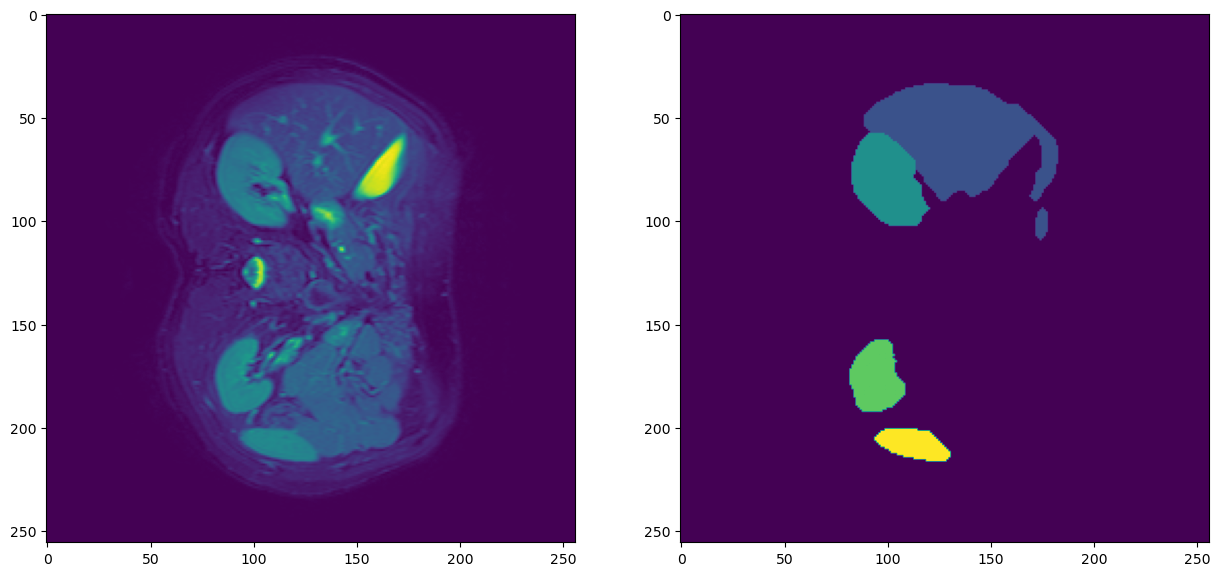

(256, 256, 36)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 36) float32 (256, 256, 36) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         0.88888889]


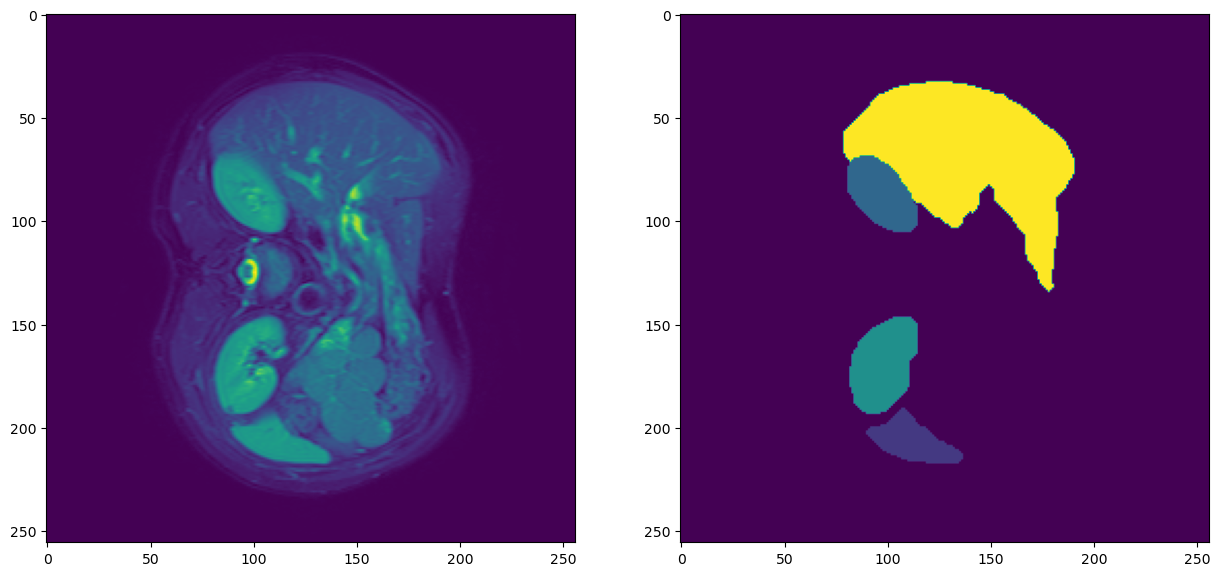

(256, 256, 32) [1.54296875 1.54296875 8.66249979]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 10
[[  -1.69921875    0.            0.          215.37475586]
 [  -0.            1.69921875    0.         -210.3140564 ]
 [   0.           -0.            7.69999981 -163.12043762]
 [   0.            0.            0.            1.        ]]
(256, 256, 36) float32


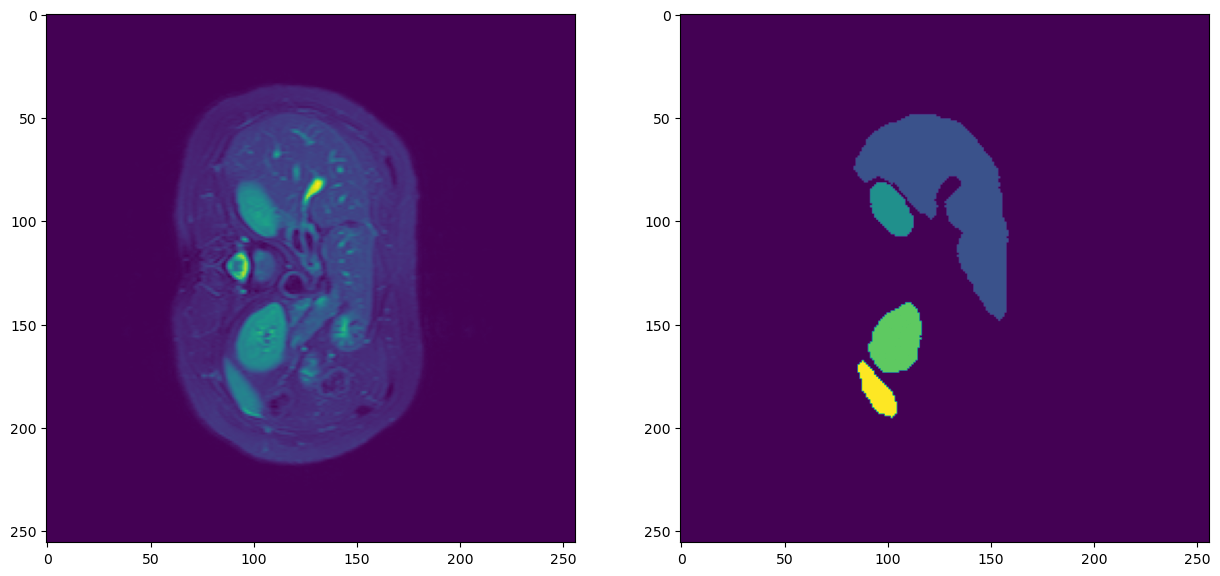

(256, 256, 36)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 36) float32 (256, 256, 36) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         0.88888889]


(256, 256, 32) [1.69921875 1.69921875 8.66249979]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 13
[[  -1.359375      0.            0.          206.36827087]
 [  -0.            1.359375      0.         -203.96994019]
 [   0.           -0.            9.         -108.50717163]
 [   0.            0.            0.            1.        ]]
(320, 320, 30) float32


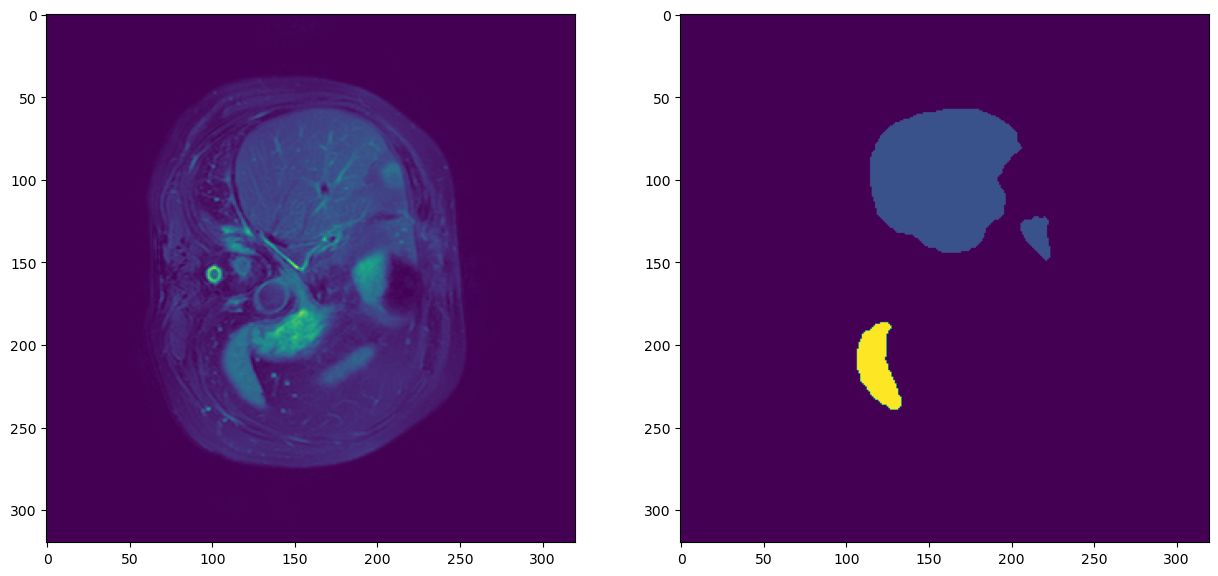

(320, 320, 30)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 30) float32 (320, 320, 30) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        1.06666667]


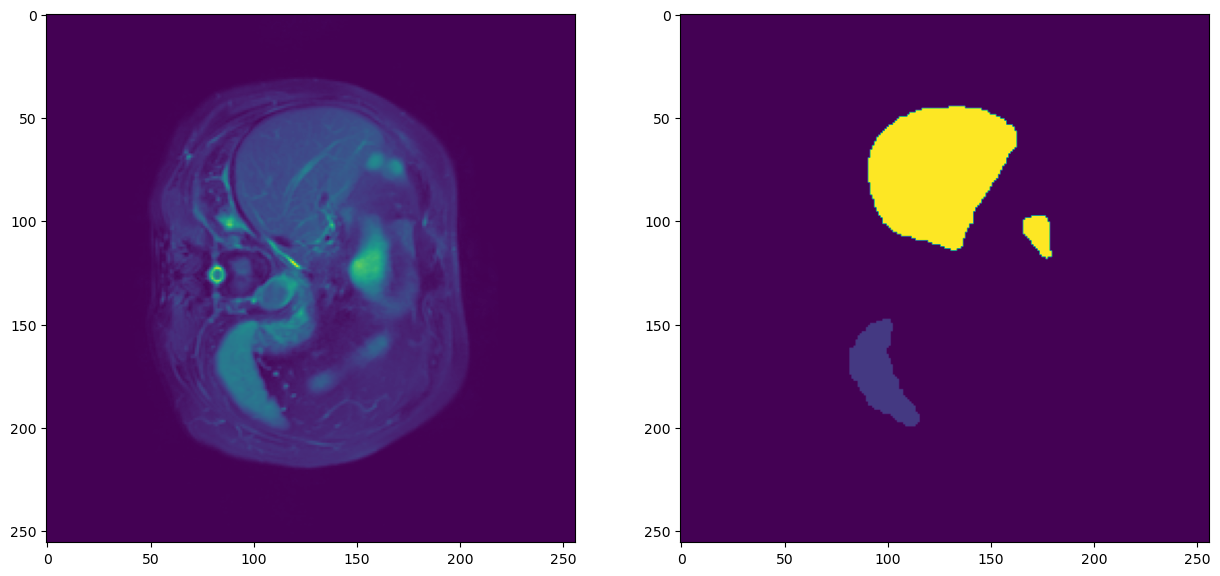

(256, 256, 32) [1.69921875 1.69921875 8.4375    ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 15
[[  -1.58203125    0.            0.          232.2824707 ]
 [  -0.            1.58203125    0.         -196.75868225]
 [   0.           -0.            9.          -82.30960083]
 [   0.            0.            0.            1.        ]]
(256, 256, 26) float32


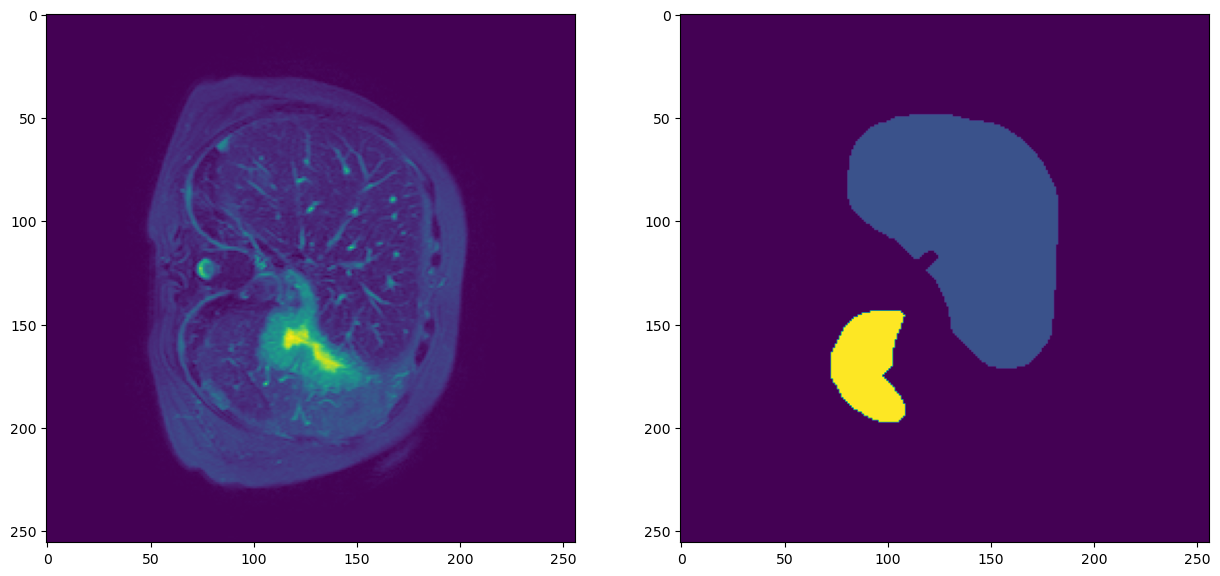

(256, 256, 26)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 26) float32 (256, 256, 26) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.23076923]


Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 19
[[  -1.359375      0.            0.          212.23243713]
 [  -0.            1.359375      0.         -212.2610321 ]
 [   0.           -0.            9.          -93.84884644]
 [   0.            0.            0.            1.        ]]
(320, 320, 30) float32


(320, 320, 30)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 30) float32 (320, 320, 30) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        1.06666667]


Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 2
[[-1.35935950e+00  0.00000000e+00 -4.29896563e-02  2.00404297e+02]
 [-0.00000000e+00  1.35937500e+00  0.00000000e+00 -1.81177933e+02]
 [-6.49323827e-03 -0.00000000e+00  8.99989700e+00 -5.08659668e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(320, 320, 26) float32


(320, 320, 26)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 26) float32 (320, 320, 26) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        1.23076923]


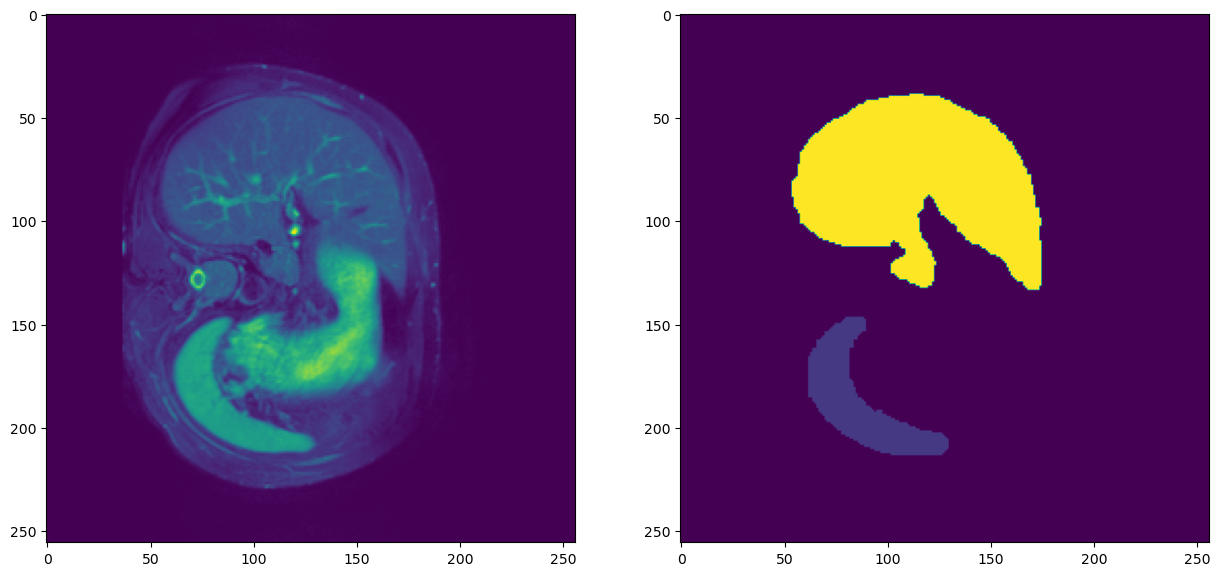

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 20
[[  -1.359375      0.            0.          217.5       ]
 [  -0.            1.359375      0.         -203.87002563]
 [   0.           -0.            9.         -101.79637146]
 [   0.            0.            0.            1.        ]]
(320, 320, 26) float32


(320, 320, 26)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 26) float32 (320, 320, 26) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        1.23076923]


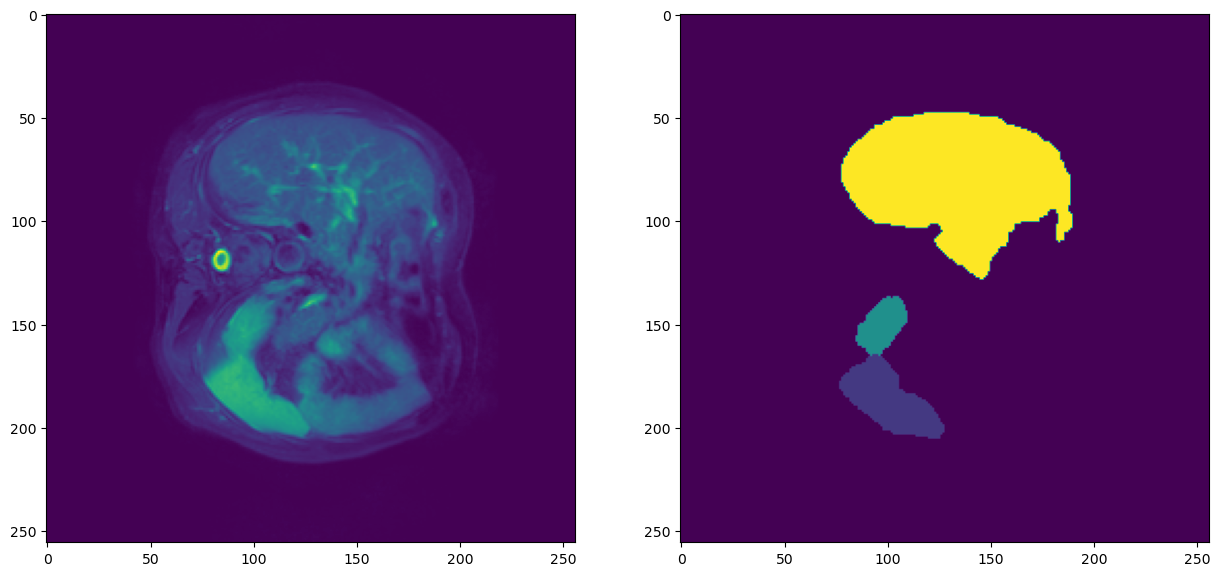

(256, 256, 32) [1.69921875 1.69921875 7.3125    ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 21
[[-1.65970337e+00 -1.56573206e-02 -1.70938239e-01  2.34616425e+02]
 [-1.56616867e-02  1.66008234e+00  1.78019211e-04 -2.11712524e+02]
 [-3.54711041e-02 -3.71580216e-04  7.99817371e+00 -1.47225952e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 31) float32


(256, 256, 31)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 31) float32 (256, 256, 31) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.03225806]


Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 22
[[-1.73822892e+00 -8.93467385e-03 -5.06008863e-02  2.15227020e+02]
 [-8.76899529e-03  1.73802865e+00 -1.41679525e-01 -2.02319458e+02]
 [-1.02542117e-02  2.82560568e-02  8.69869900e+00 -2.00067947e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 33) float32


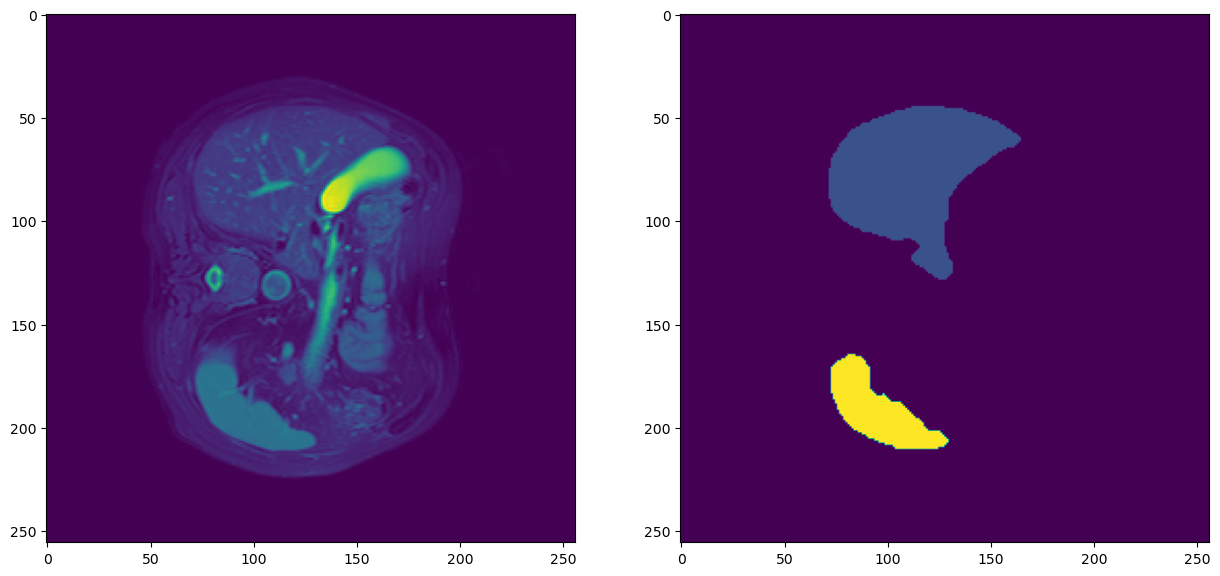

(256, 256, 33)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 33) float32 (256, 256, 33) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         0.96969697]


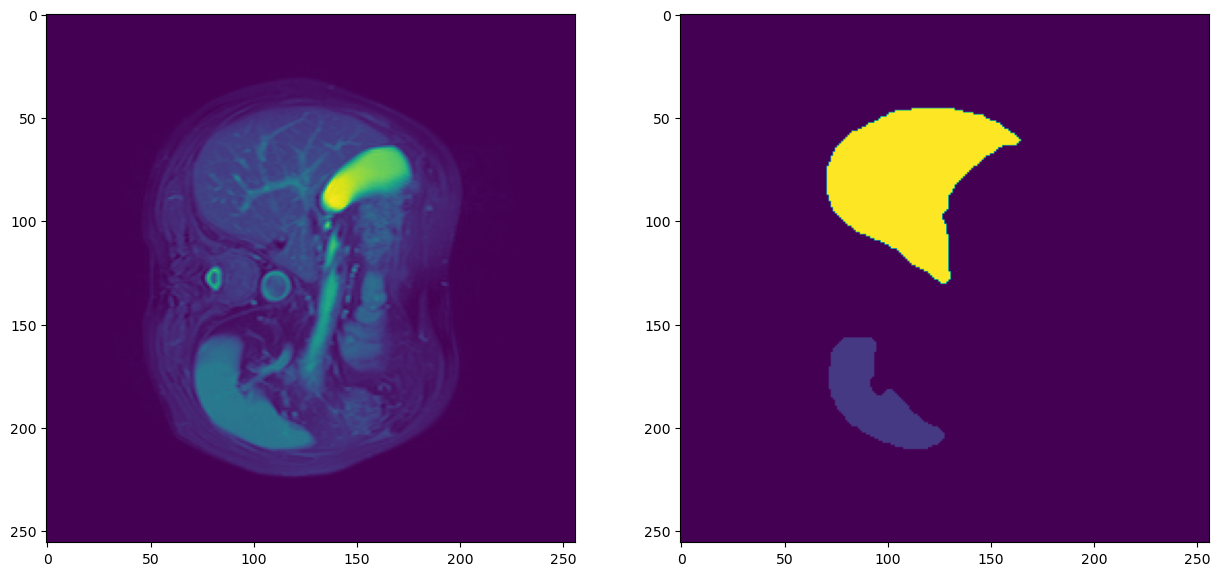

(256, 256, 32) [1.73828125 1.73828125 8.9718748 ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 3
[[  -1.359375      0.            0.          195.048172  ]
 [  -0.            1.359375      0.         -203.98342896]
 [   0.           -0.            9.          -55.77750397]
 [   0.            0.            0.            1.        ]]
(320, 320, 30) float32


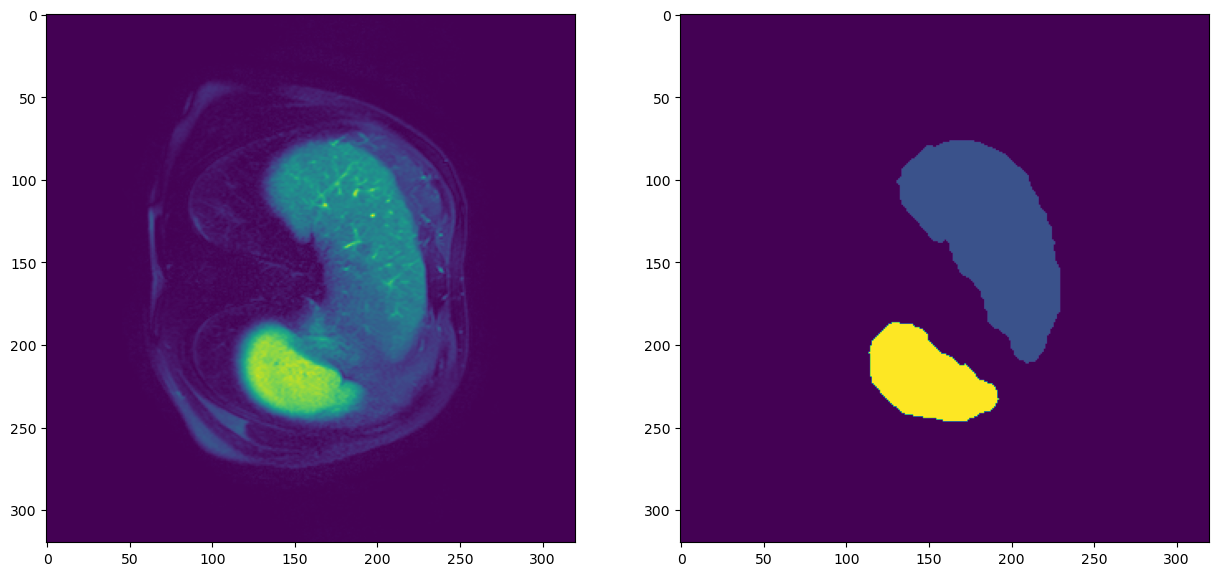

(320, 320, 30)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 30) float32 (320, 320, 30) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        1.06666667]


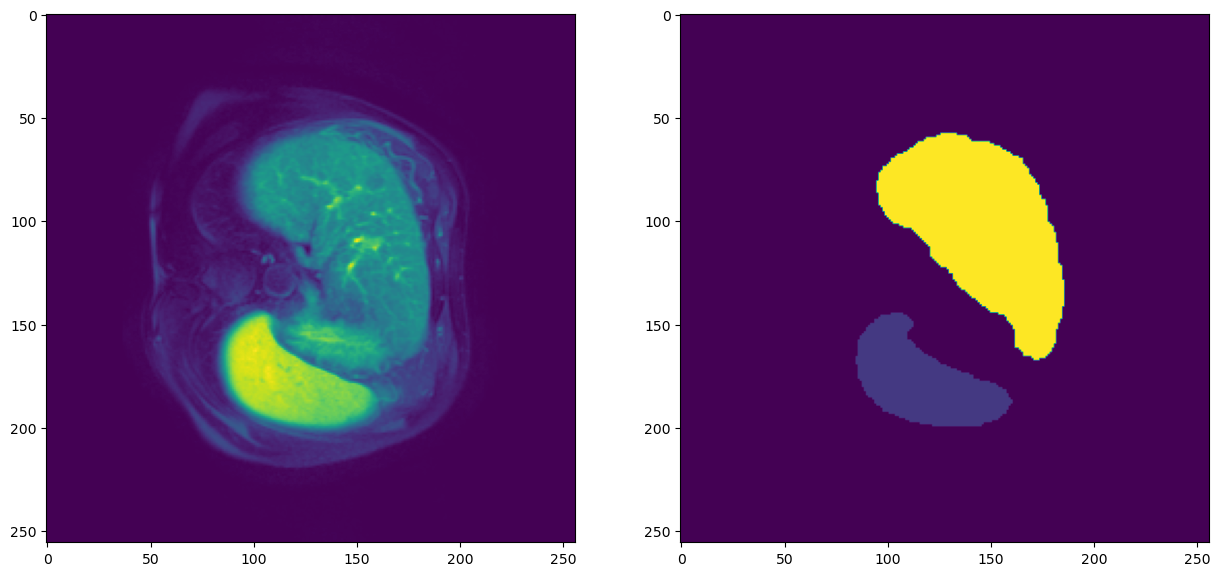

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 31
[[-1.62109375e+00  0.00000000e+00  0.00000000e+00  2.06705917e+02]
 [-0.00000000e+00  1.62105966e+00 -5.83823062e-02 -2.16805771e+02]
 [ 0.00000000e+00  1.05159096e-02  8.99981022e+00  1.35922745e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 29) float32


(256, 256, 29)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 29) float32 (256, 256, 29) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.10344828]


(256, 256, 32) [1.62109375 1.62109375 8.15625   ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 32
[[  -1.81640625    0.            0.          245.61325073]
 [  -0.            1.81640625    0.         -190.68359375]
 [   0.           -0.            9.         -194.90426636]
 [   0.            0.            0.            1.        ]]
(256, 256, 39) float32


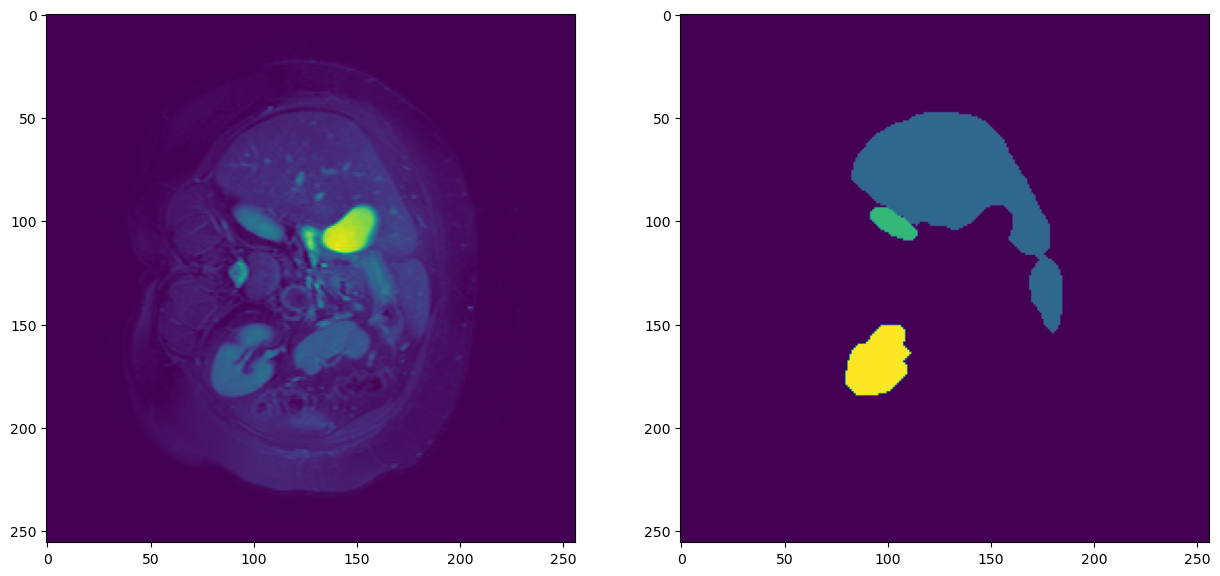

(256, 256, 39)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 39) float32 (256, 256, 39) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         0.82051282]


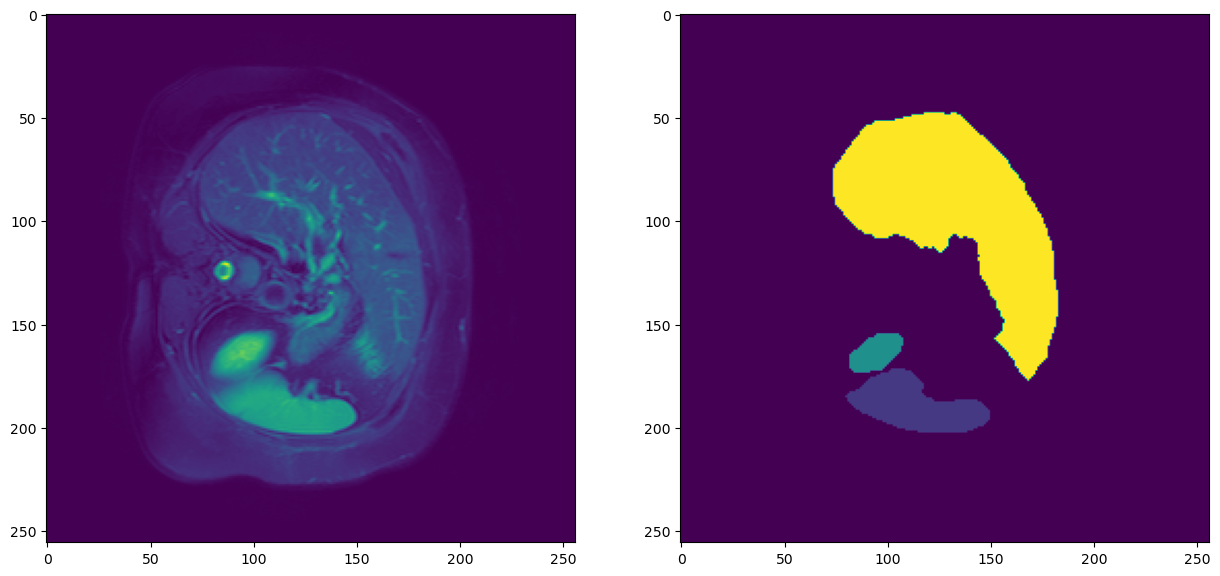

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 33
[[-1.73827863e+00 -1.46113907e-03  1.36060249e-02  2.24347610e+02]
 [-1.43147819e-03  1.73817062e+00  1.01270609e-01 -2.11209793e+02]
 [ 2.64417310e-03 -1.95574574e-02  8.99942017e+00  1.49571182e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 29) float32


(256, 256, 29)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 29) float32 (256, 256, 29) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.10344828]


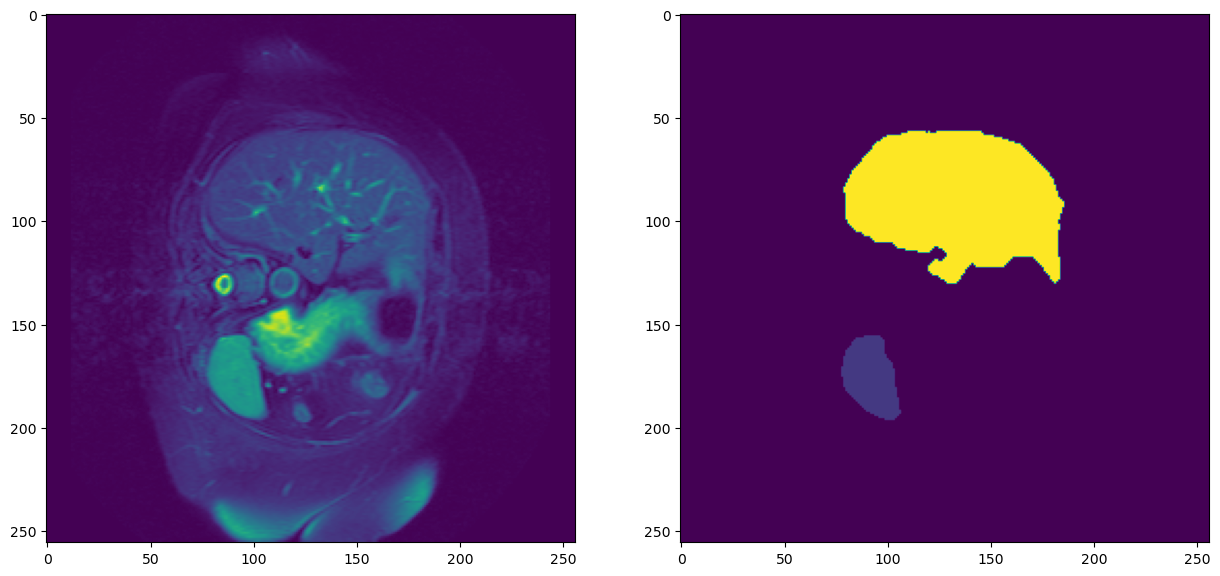

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 34
[[  -1.73828125    0.            0.          219.34210205]
 [  -0.            1.73828125    0.         -235.49856567]
 [   0.           -0.            8.80000019 -141.2746582 ]
 [   0.            0.            0.            1.        ]]
(256, 256, 30) float32


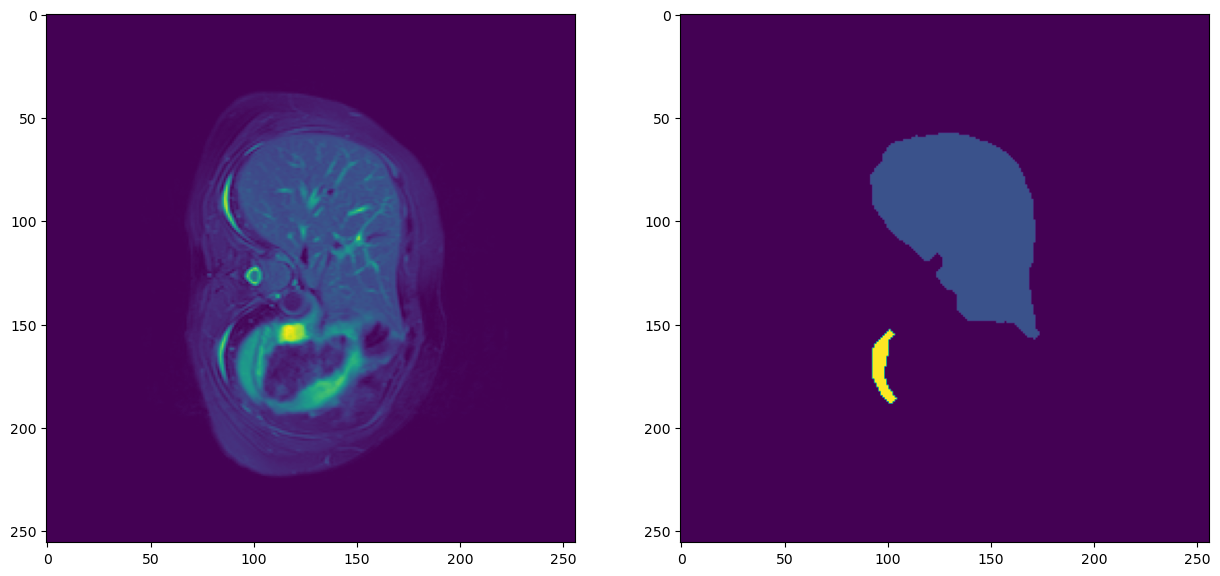

(256, 256, 30)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 30) float32 (256, 256, 30) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.06666667]


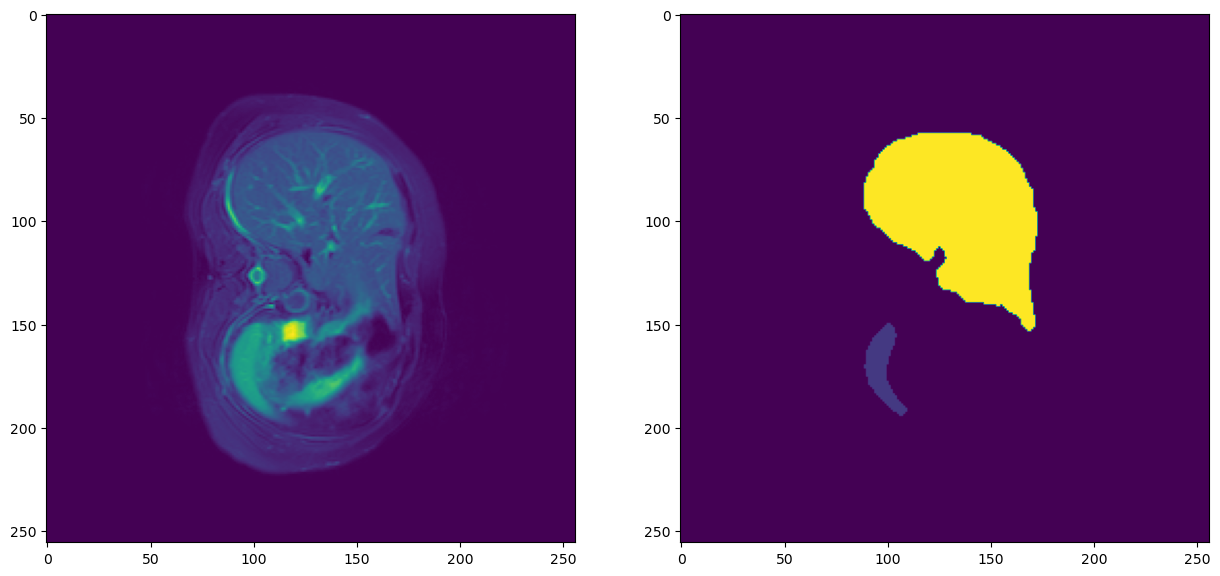

(256, 256, 32) [1.73828125 1.73828125 8.25000018]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 36
[[  -1.62109375    0.            0.          214.11024475]
 [  -0.            1.62109375    0.         -212.11064148]
 [   0.           -0.            9.           72.7631073 ]
 [   0.            0.            0.            1.        ]]
(256, 256, 38) float32


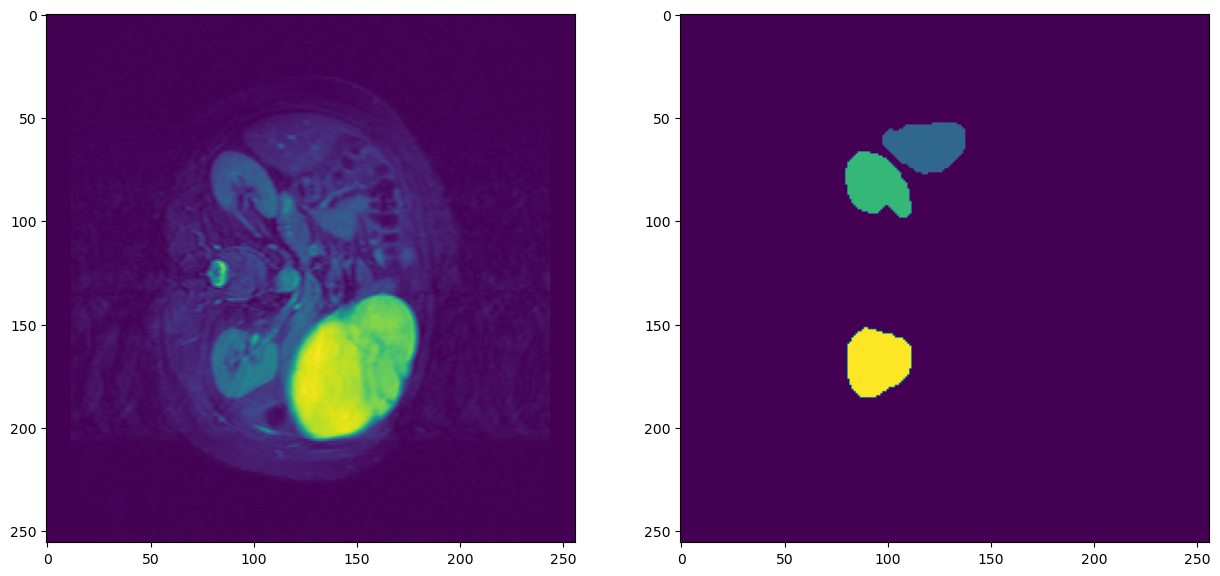

(256, 256, 38)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 38) float32 (256, 256, 38) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         0.84210526]


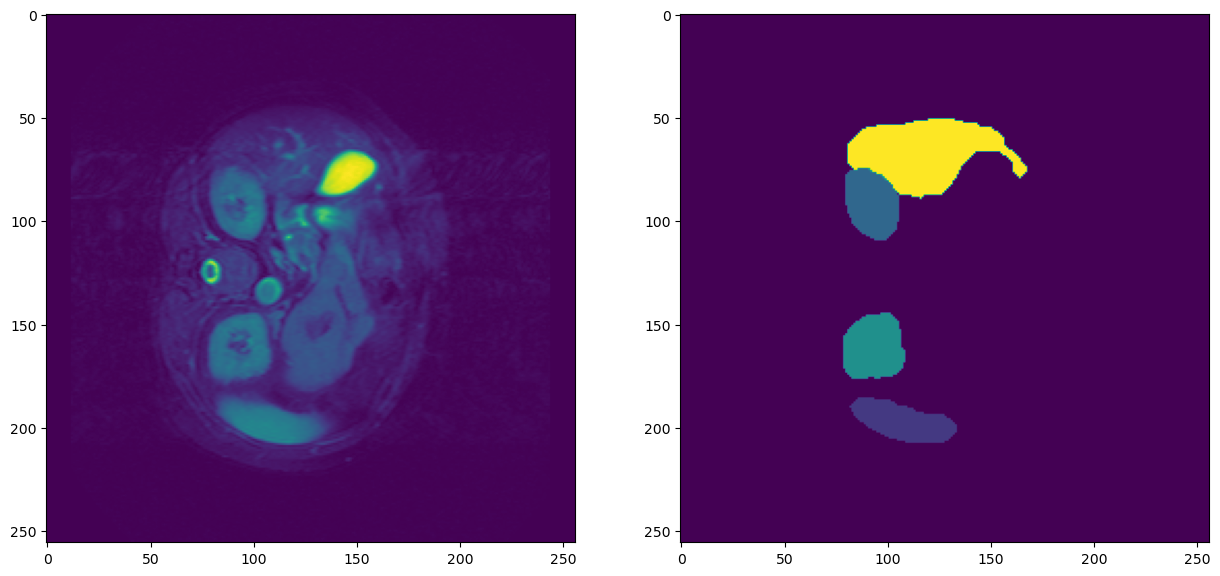

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 37
[[  -1.46484375    0.            0.          172.43424988]
 [  -0.            1.46484375    0.         -187.66410828]
 [   0.           -0.            9.         -140.18969727]
 [   0.            0.            0.            1.        ]]
(256, 256, 32) float32


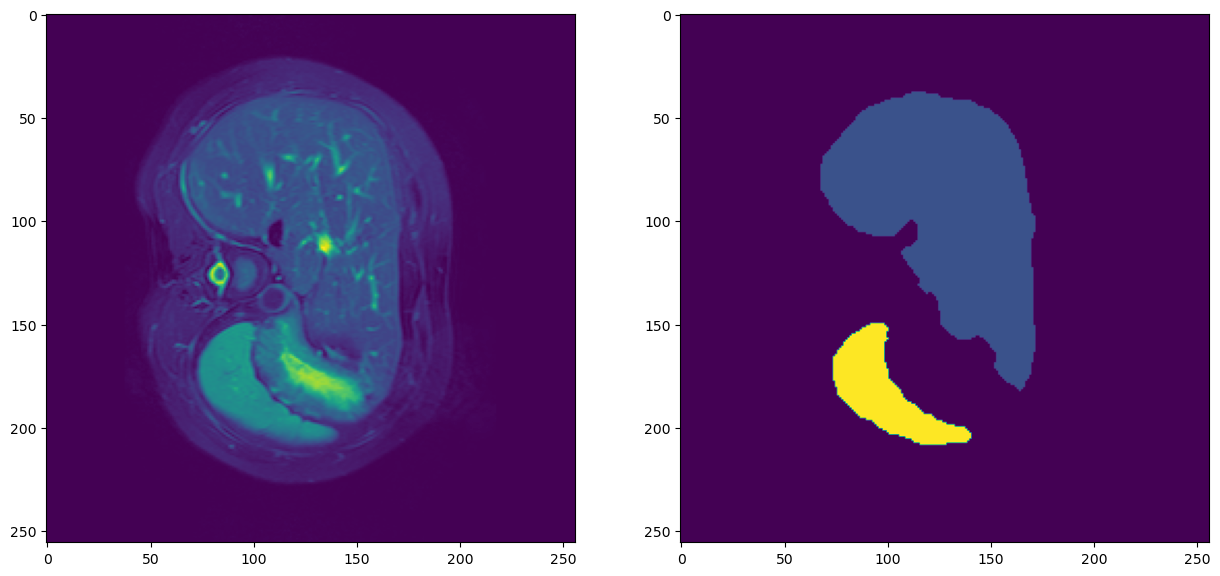

(256, 256, 32)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 32) float32 (256, 256, 32) int64
[0 1 2 3 6]
resize_factor:  [1. 1. 1.]


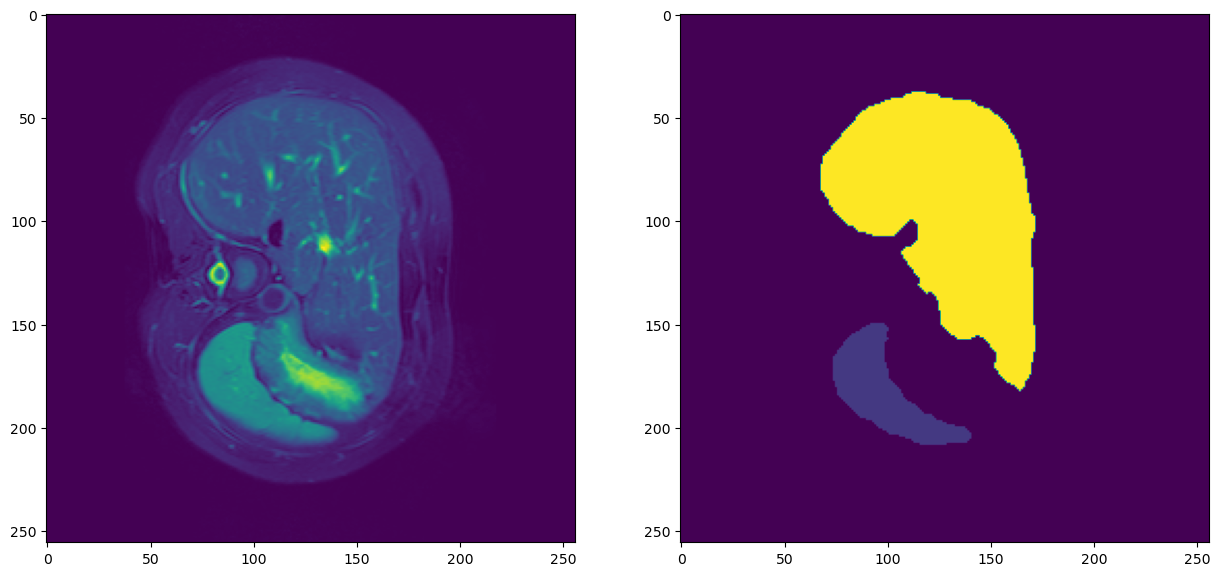

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 38
[[  -1.359375      0.            0.          205.80036926]
 [  -0.            1.359375      0.         -223.50904846]
 [   0.           -0.            9.         -167.11737061]
 [   0.            0.            0.            1.        ]]
(320, 320, 34) float32


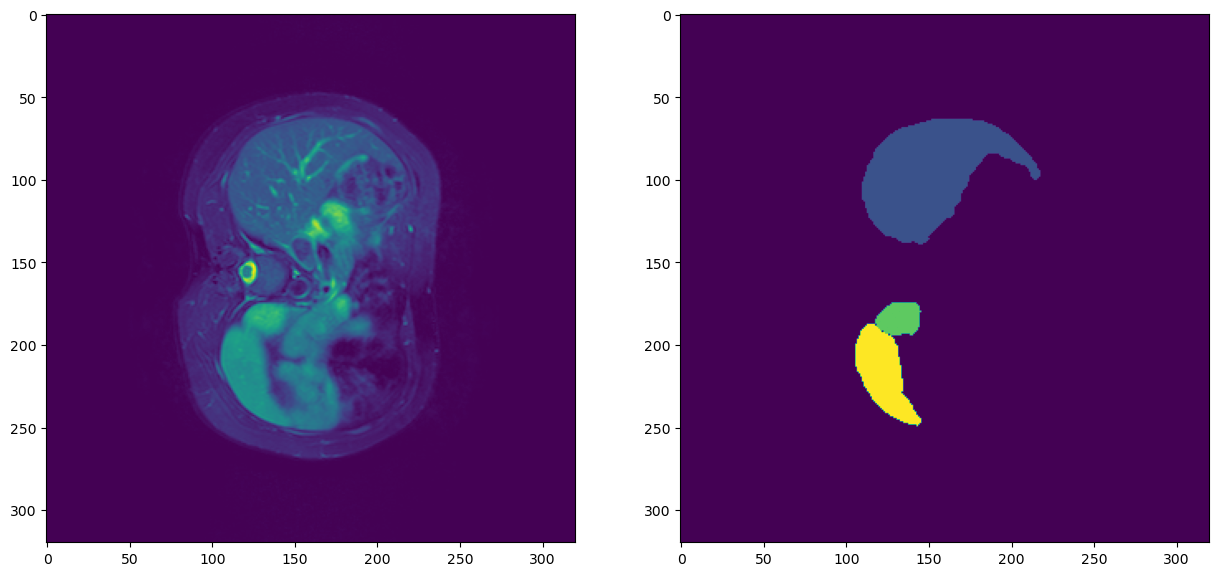

(320, 320, 34)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (320, 320, 34) float32 (320, 320, 34) int64
[0 1 2 3 6]
resize_factor:  [0.8        0.8        0.94117647]


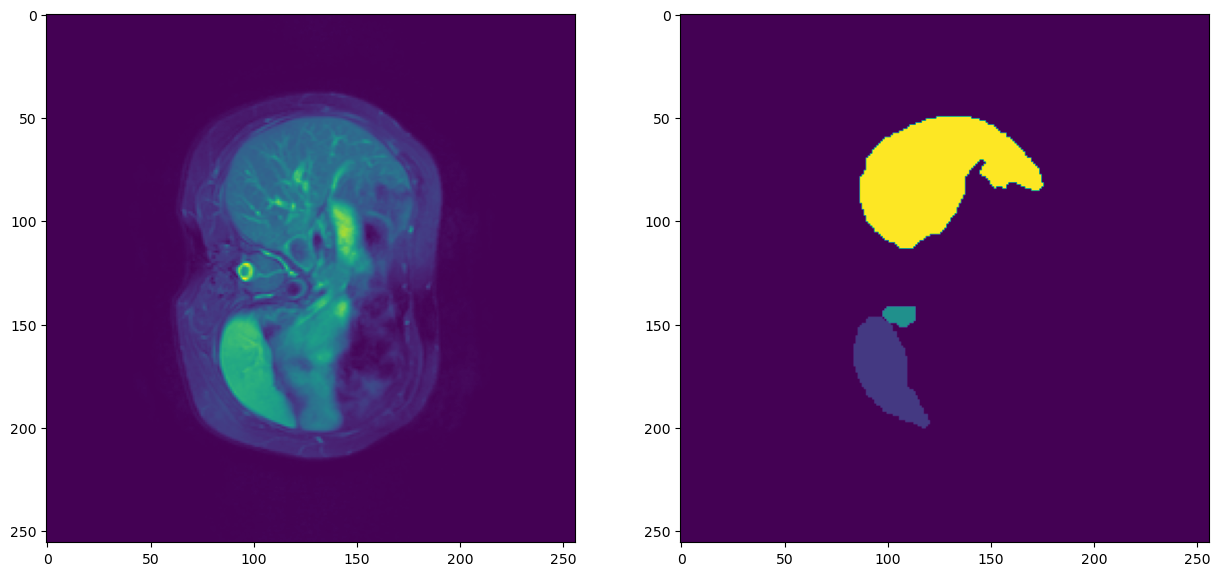

(256, 256, 32) [1.69921875 1.69921875 9.5625    ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 39
[[-1.58062410e+00  6.66592717e-02  1.49113461e-02  1.85232742e+02]
 [ 6.66593611e-02  1.58062625e+00  0.00000000e+00 -2.10610992e+02]
 [ 2.61880597e-03 -1.10442263e-04  8.99998760e+00 -1.16669373e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 26) float32


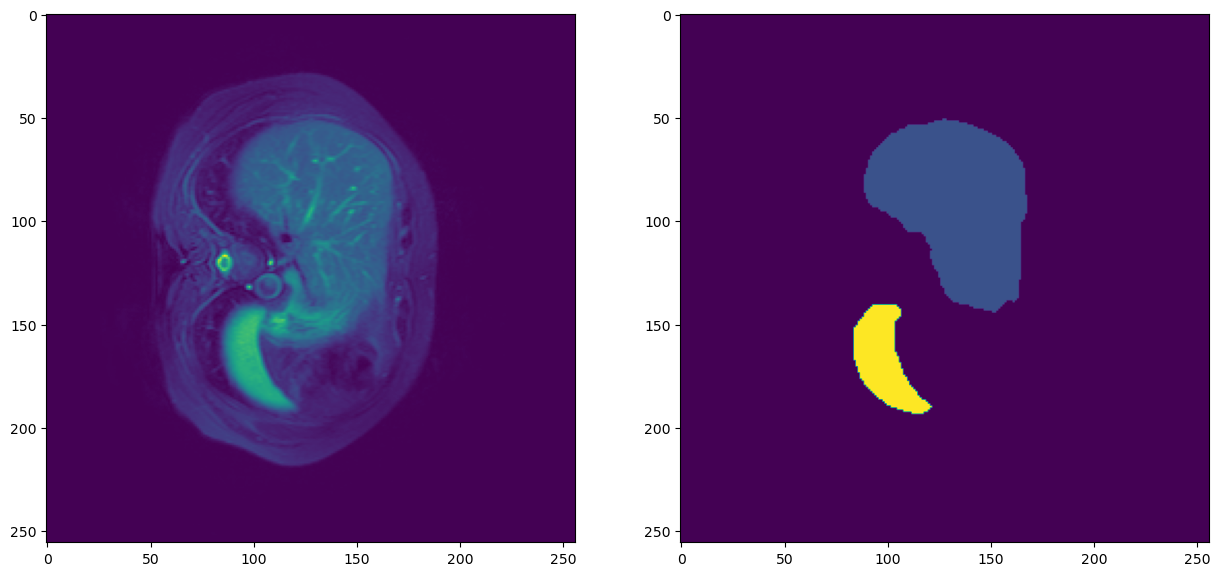

(256, 256, 26)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 26) float32 (256, 256, 26) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.23076923]


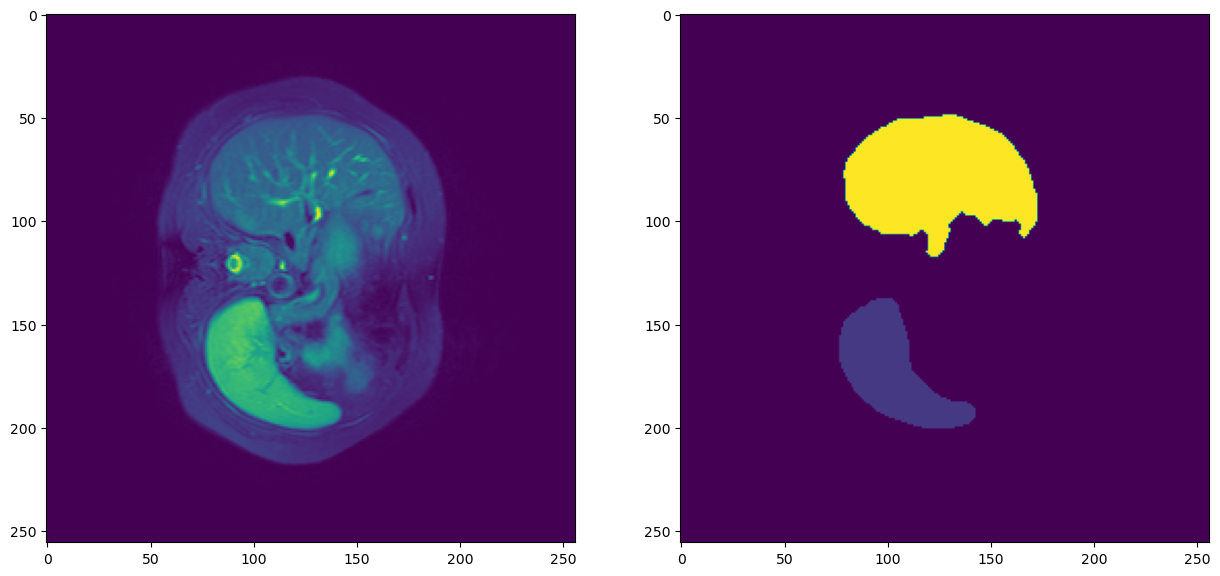

Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 5
[[  -1.66015625    0.            0.          218.20716858]
 [  -0.            1.66015625    0.         -192.83520508]
 [   0.           -0.            9.         -143.58108521]
 [   0.            0.            0.            1.        ]]
(256, 256, 30) float32


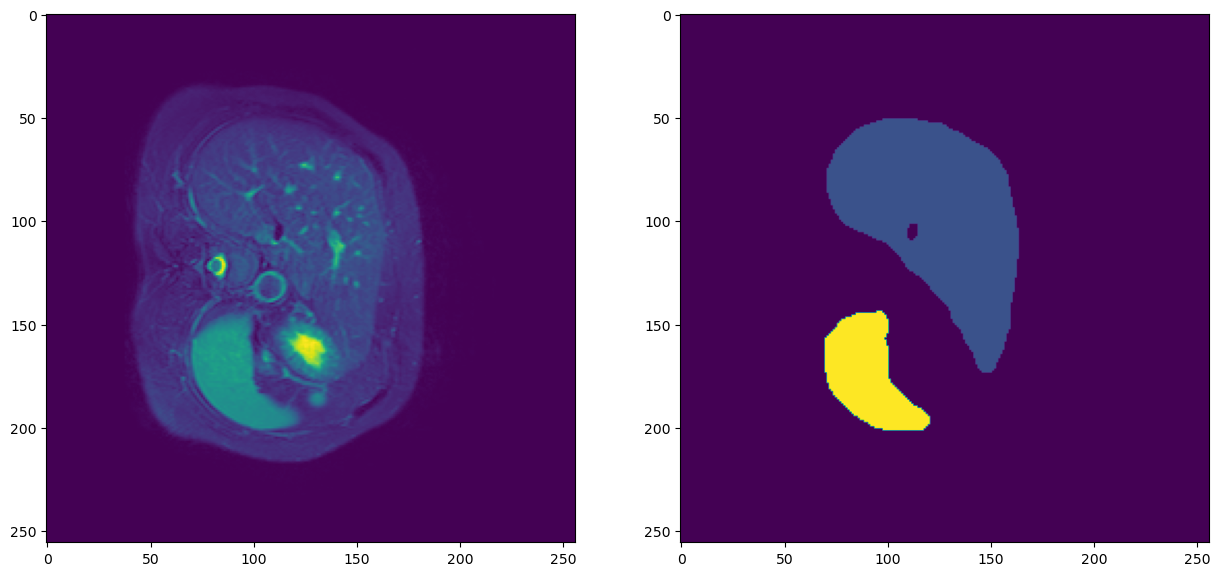

(256, 256, 30)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (256, 256, 30) float32 (256, 256, 30) int64
[0 1 2 3 6]
resize_factor:  [1.         1.         1.06666667]


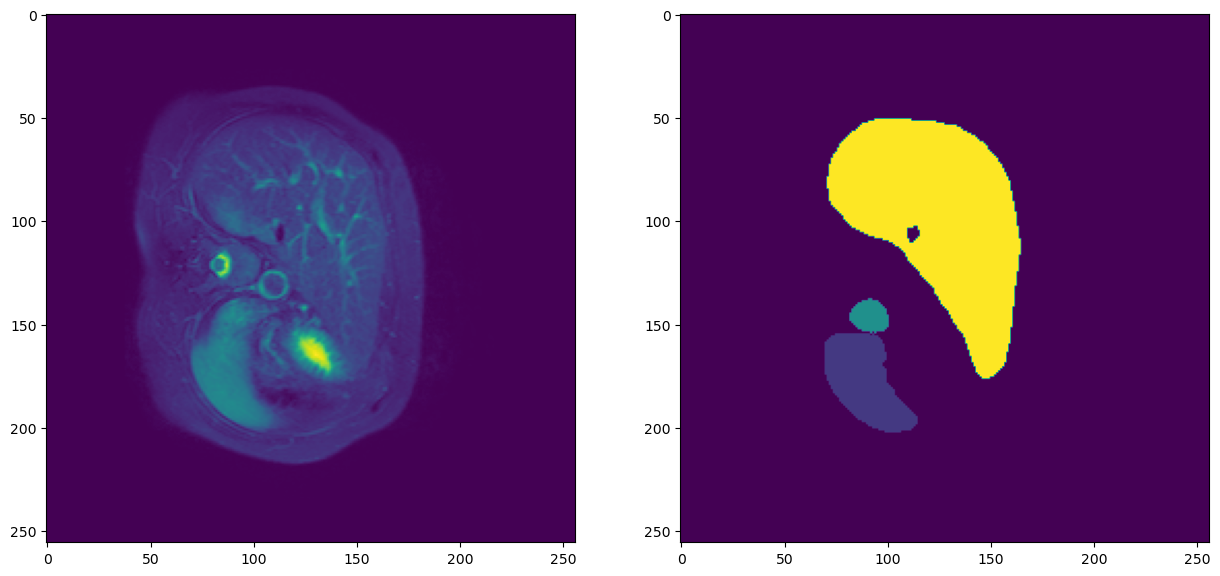

(256, 256, 32) [1.66015625 1.66015625 8.4375    ]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)

Proprecess train image 8
[[  -1.40625       0.            0.          197.23243713]
 [  -0.            1.40625       0.         -179.90646362]
 [   0.           -0.            7.99999952  -53.62899017]
 [   0.            0.            0.            1.        ]]
(288, 288, 32) float32


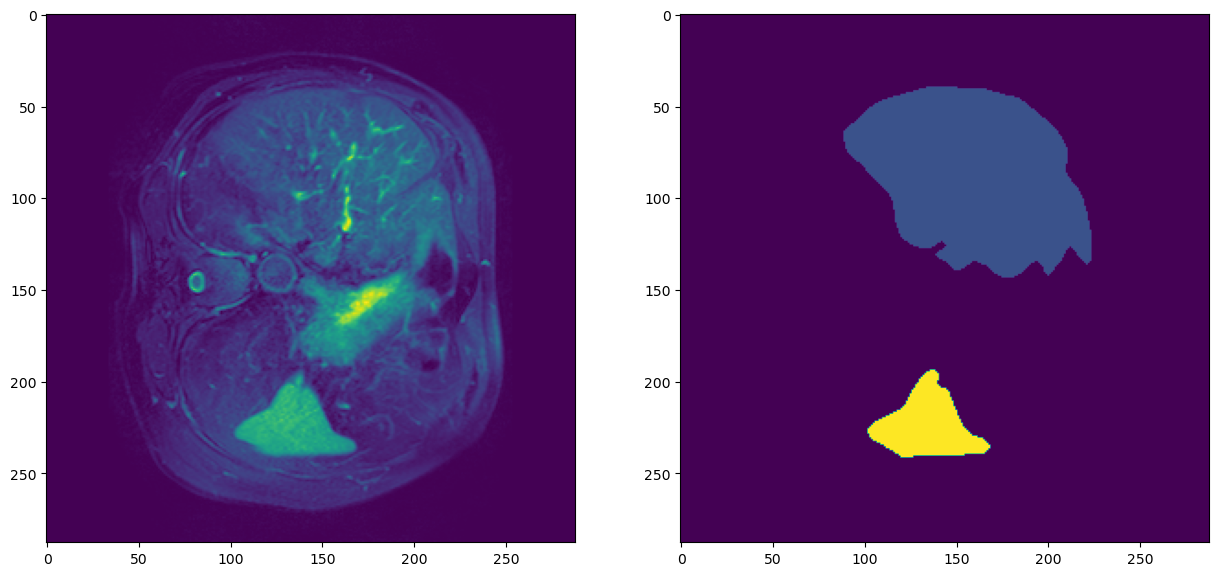

(288, 288, 32)
[0.         0.24705882 0.49411765 0.7411765  0.9882353 ]
Image and label shape before resize:  (288, 288, 32) float32 (288, 288, 32) int64
[0 1 2 3 6]
resize_factor:  [0.88888889 0.88888889 1.        ]


(256, 256, 32) [1.58203125 1.58203125 7.99999952]
[0 1 2 3 6]
Image and label shape after resize:  (256, 256, 32) (256, 256, 32)



In [12]:

for j in range(1):
    image_path = path[j]
    files = os.listdir(image_path)
    files.sort()
    print(files,len(files))
    reader = sitk.ImageSeriesReader()
    for patient in files:
        print("Proprecess train image " + str(patient))
        img, img_header, img_affine, img_spacing = read_nii(op.join(nii_path, str(patient)+'/procimg.nii.gz'))
        print(img_affine)
        img = img.astype(np.float32)
        print(img.shape,img.dtype)
        
        if j == 0:
            labels = os.listdir(image_path + patient +'/T2SPIR/Ground')
            labels.sort()
            #print(labels)

            #get the mask and concat them
            for i in range(len(labels)):
                if i == 0:
                    label = mpimg.imread(image_path + patient +'/T2SPIR/Ground/'+labels[i]).transpose()
                    label = np.fliplr(label)
#                     label = np.fliplr(label)
                    label = label[...,np.newaxis]
                else:
                    mask = mpimg.imread(image_path + patient +'/T2SPIR/Ground/'+labels[i]).transpose()
                    mask = np.fliplr(mask)
#                     mask = np.fliplr(mask)[...,np.newaxis]
                    mask = mask[...,np.newaxis]
                    label = np.concatenate((label,mask),axis=2)

            plt.rcParams['figure.figsize'] = (15.0,15.0)
    
            fig,axes = plt.subplots(1,2)
            ax1 = axes[0]
            ax2 = axes[1]

            ax1.imshow(img[:,:,20])
            ax2.imshow(label[:,:,20])
            plt.show()
            print(label.shape)
            
            label_unique = np.unique(label)
            print(label_unique)

            label[label == 0.9882353] = 1
            label[label == 0.49411765] = 2
            label[label == 0.7411765] = 3
            label[label == 0.24705882] = 6
            label[label == 0] = 0

            label = label.astype(np.int64)
            print('Image and label shape before resize: ', img.shape,img.dtype, label.shape,label.dtype)

            label_unique = np.unique(label)
            print(label_unique)
            for l in label_unique:
                if l not in require_labels:
                    label[label == l] = 0 
            
        if patient in ['1', '5', '8', '10', '13', '20', '22', '31', '34', '38']: # random select validation set
            nii_save_path = op.join(save_path,'valid', str(patient))
            create_path([nii_save_path]) 
            img, label, space = create_and_save_resize_data(resample_size, img, label,
                                                  patient, img_spacing,img_header, 
                                                  img_affine, nii_save_path)
            
            fig,axes = plt.subplots(1,2)
            ax1 = axes[0]
            ax2 = axes[1]

            ax1.imshow(img[:,:,20])
            ax2.imshow(label[:,:,20])
            plt.show()
            print(label.shape,space)
            label_unique = np.unique(label)
            print(label_unique)
            
        
        else :
            nii_save_path = op.join(save_path,'train', str(patient))
            create_path([nii_save_path])    
            if j == 0:
                img, label, space = create_and_save_resize_data(resample_size, img, label,
                                                  patient, img_spacing,img_header, 
                                                  img_affine, nii_save_path)

                fig,axes = plt.subplots(1,2)
                ax1 = axes[0]
                ax2 = axes[1]

                ax1.imshow(img[:,:,20])
                ax2.imshow(label[:,:,20])
                plt.show()
                
            else :
                print(patient)
                origin_shape = np.array(img.shape)
                new_space = img_spacing * origin_shape / resample_size
                resize_factor = 1.0 * np.asarray(resample_size) / np.asarray(origin_shape)
                print('resize_factor: ', resize_factor)
                img = zoom(img, resize_factor, order=1) #order = 1：bilinear interpolaion
                img_header['pixdim'][1:4] = new_space
                save_nii(img, op.join(nii_save_path, 'procimg.nii.gz'), img_header, img_affine)

        print('Image and label shape after resize: ', img.shape, label.shape)
        print()